# Exercise 1
In this exercise, you are supposed to apply several methods estimating the importance of a certain feature, so called feature importance methods. Please use scikit-learn for this exercise.

* Finish the exercise until 25/10/2023 17:00 German time.
* In order to gain a bonus point for this exercise, 4 of 5 tests should pass. We will manually check failed tests such that even if you managed to solve the exercise in a way that the tests do not pass, but it is still correct, you will still receive the bonus point.
* More details can be found in the README.md

IMPORTANT
* Do not add or delete cells from this notebook!
* Do not rename existing variables, in particular those ones for which assignments are missing!

## 1.1 Load data

- Read in the csv file `wheat_seeds.csv`, which consists of 199 data instances with 8 features each.
- Divide the data into X and y:
  - X should be a two-dimensional numpy array with the shape (199,7) derived from all columns except the last.
  - y should be a two-dimensional numpy array with the shape (199,) derived from the last column. This last column contains the `type` value, which we want to determine for unseen
    data in the end.
- Shuffle the data using `sklearn.utils.shuffle`. Set `random_state=0`.

Hints:
- Use pandas to read in the file easily and convert them to a numpy array.
- Use `shape` to check the dimension of a numpy array.

In [1]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle

#set the random state
random_state = 0

#load data 
data = np.array(pd.read_csv("wheat_seeds.csv")) 

#create features and labels
X, y = data[:,:-1], data[:,-1] # assign me
print("X_shape:",X.shape)
print("y_shape:",y.shape)

#shuffle data
X, y = shuffle(X,random_state=random_state), shuffle(y,random_state=random_state)
print("X_shape:",X.shape)
print("y_shape:",y.shape)

X_shape: (199, 7)
y_shape: (199,)
X_shape: (199, 7)
y_shape: (199,)


# 1.2 Drop samples with NaN as target

* Drop all instances, which have NaN as a target.

In [2]:
check_nan = np.isnan(y).tolist()
index_nan = [check_nan.index(i) for i in check_nan if i == True]
for i in index_nan:
    y = np.delete(y,i)
    X = np.delete(X,i,axis=0)
    
print("X_shape:",X.shape)
print("y_shape:",y.shape)

X_shape: (198, 7)
y_shape: (198,)


# 1.3 Split data into training and test data

* Create a 70/30 train/test split, meaning that the training data should contain (roughly) 70% of the whole dataset and the test data (roughly) 30% of the original dataset.
* This split should be stratified according to the target column.
* Use 'sklearn.model_selection.train_test_split' with 42 as random_state for this.

In [3]:
from sklearn.model_selection import train_test_split

random_state=42
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7,random_state=random_state,stratify=y)# assign me
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (138, 7)
X_test shape: (60, 7)
y_train shape: (138,)
y_test shape: (60,)


# 1.4 Train a random forest from scikit-learn

* Train a random forest from scikit-learn with 100 trees and 0 as random state on the training data.
* Before training the random forest apply a standard scaler to the features.
* Combine the two into a pipeline object.

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

n_trees = 100
random_state = 0
random_forest = RandomForestClassifier(n_estimators=n_trees,random_state=random_state)# assign me
standard_scaler = StandardScaler()# assign me

pipeline = make_pipeline(standard_scaler, random_forest)

# TODO fit pipeline
pipeline.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=0))])

# 1.5 Compute feature importance based on impurity

* Random forests from scikit-learn automatically deliver feature importance values based on the decrease of impurity after they have been trained.
* Familiarize yourself with this concept by searching for corresponding material on the internet and extract the average importance across the trees of the trained forest for each feature. The result should be a numpy array with one entry per feature corresponding to that average importance.
* Furthermore, compute the corresponding standard deviation for each feature and store it in the corresponding numpy array.

In [5]:
import numpy as np

all_trees_fearture_importances = [tree.feature_importances_ for tree in random_forest.estimators_]

average_importances = np.mean(all_trees_fearture_importances,axis=0)# assign me
std_importances = np.std(all_trees_fearture_importances,axis=0)# assign me

print(f"Average feature importances: {average_importances}.")
print(f"Standard deviation of feature importances: {std_importances}.")

Average feature importances: [0.17419392 0.23442027 0.04707079 0.14791778 0.15531865 0.06236171
 0.17871688].
Standard deviation of feature importances: [0.21261737 0.24466373 0.08670116 0.21020891 0.18980712 0.07108178
 0.22750557].


# 1.6 Plot the feature importance including error bars

* Visualize the corresponding feature importance values computed in the previous step.
* To this end, generate a bar plot, which shows the average feature importance for each feature including the standard deviation as error bars on those bar plots.

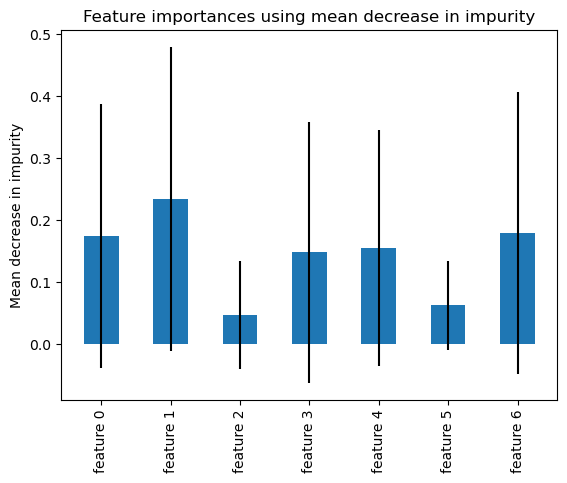

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

feartures = ["feature " + str(i) for i in range(len(average_importances))]
# TODO generate plot
plt.figure()
#plot the bars
bar_width = 0.5
plt.bar(feartures,average_importances,width=bar_width)
plt.ylabel("Mean decrease in impurity")
plt.title("Feature importances using mean decrease in impurity")
plt.xticks(rotation = 90)
#plot the line
line_position = np.arange(0,len(average_importances))
plt.vlines(line_position,average_importances-std_importances, average_importances+std_importances,colors="black")


# 1.8 Compute feature importance based on permutation

* Of course there are also other ways to compute importance values for features. Another one implemented in scikit-learn is permutation-based feature importance, which can be computed independently of the used ML algorithm.
* Familiarize yourself with this concept by searching for corresponding material on the internet and extract the average importance across 10 permutations for each feature using the test data. The result should be a numpy array with one entry per feature corresponding to that average importance. Use 0 as a random_state for this.
* Furthermore, compute the corresponding standard deviation for each feature and store it in the corresponding numpy array.

In [7]:
from sklearn.inspection import permutation_importance

perm_im = permutation_importance(pipeline,X_test,y_test,n_repeats=10,random_state=0)

average_permutation_importance = perm_im["importances_mean"] # assign me
std_permutation_importance = perm_im["importances_std"]# assign me

print(f"Average feature importances: {average_permutation_importance}.")
print(f"Standard deviation of feature importances: {std_permutation_importance}.")

Average feature importances: [ 0.015       0.03333333  0.         -0.01166667 -0.02        0.01833333
  0.02166667].
Standard deviation of feature importances: [0.02733537 0.03073181 0.         0.02114763 0.01452966 0.01166667
 0.01674979].


# 1.9 Plot the permutation based feature importance including error bars

* Once again, plot the corresponding importance values as for the impurity based feature importances before.

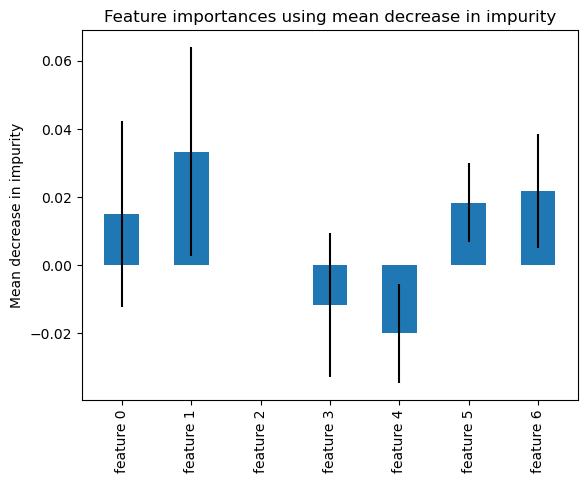

In [8]:
feartures = ["feature " + str(i) for i in range(len(average_permutation_importance))]
# TODO generate plot
plt.figure()
#plot the bars
bar_width = 0.5
plt.bar(feartures,average_permutation_importance,width=bar_width)
plt.ylabel("Mean decrease in impurity")
plt.title("Feature importances using mean decrease in impurity")
plt.xticks(rotation = 90)
#plot the line
line_position = np.arange(0,len(average_permutation_importance))
plt.vlines(line_position,average_permutation_importance-std_permutation_importance, average_permutation_importance+std_permutation_importance,colors="black")
# TODO generate plot

# Further Reading (non-mandatory)

Below we provide some references for more information on the two feature importance approaches. Reading these is not mandatory, but rather an additional offer from our side, if you want to learn more details about the approaches and their limitations.

* Impurity based feature importance:
    * https://arxiv.org/pdf/2001.04295.pdf

* Permutation based feature importance:
    * https://christophm.github.io/interpretable-ml-book/feature-importance.html
